<a href="https://colab.research.google.com/github/Gizem-kaya/Image-Processing-with-Python/blob/master/Image_restoration_noise_segmentation_contours.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Image restoration, Noise, Segmentation and Contours**

In [1]:
import numpy as np
from skimage.restoration import inpaint_biharmonic
from skimage.restoration import inpaint
import matplotlib.pyplot as plt
from skimage.util import random_noise
from skimage.restoration import denoise_tv_chambolle
from skimage.restoration import denoise_bilateral
from skimage.segmentation import slic
from skimage.color import label2rgb
from skimage import color, measure
from skimage.filters import try_all_threshold, threshold_triangle


In [2]:
def show_comparison(original, title, filtered, new_title):
  fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (16,12), sharex = True, sharey = True )

  ax1.imshow(original, cmap = plt.cm.gray)
  ax1.set_title(title)
  ax1.axis('off')

  ax2.imshow(filtered, cmap = plt.cm.gray)
  ax2.set_title(new_title)
  ax2.axis('off')

  plt.show()

## **Image restoration**

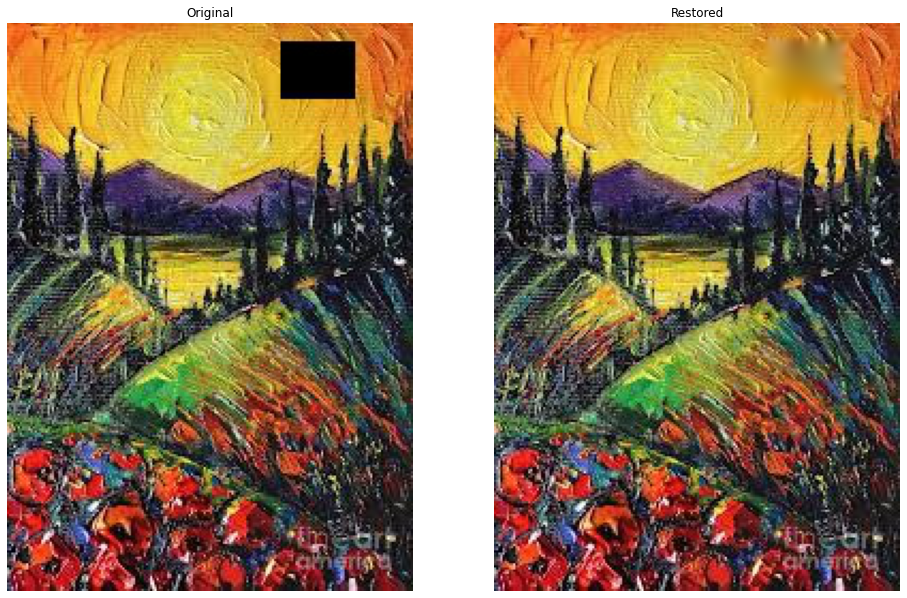

In [3]:
restore = plt.imread("restore.jpg")

mask = np.zeros(restore.shape[:-1])

mask[8:37, 127:164] = 1

restored = inpaint_biharmonic(restore, mask, multichannel = True)

show_comparison(restore,"Original", restored, "Restored")


If the missing part has an homogeneous background, the restoration process would fill this part more properly.

## **Noise**

Adding noise to an image.

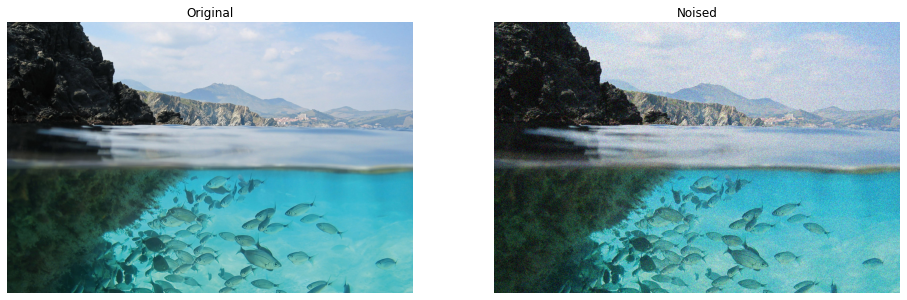

In [4]:
noise = plt.imread("noise.jpg")

noised = random_noise(noise)

show_comparison(noise, "Original", noised, "Noised")

**Reducing noise :**

*   Total Variation (TV)
*   Bilateral



 **1.   Total Variation (TV)**




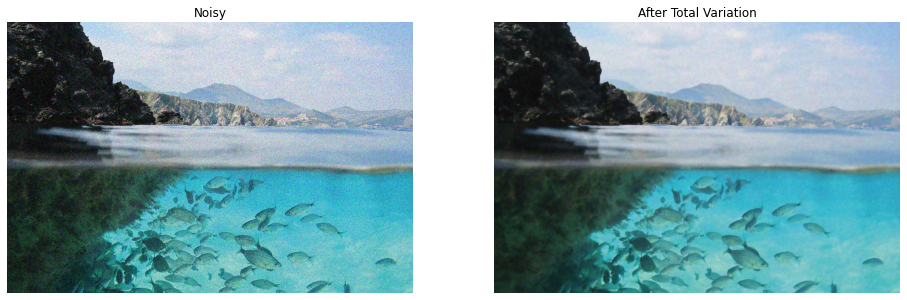

In [5]:
reduced_TV =  denoise_tv_chambolle(noised, multichannel = True)

show_comparison(noised, "Noisy", reduced_TV , "After Total Variation")

When we look closely we can see the edges in the picture are blurred. To be able to preseve the edges, we can use Bilateral Denoising.



 **2. Bilateral**

   Smoothes images while preserving edges.

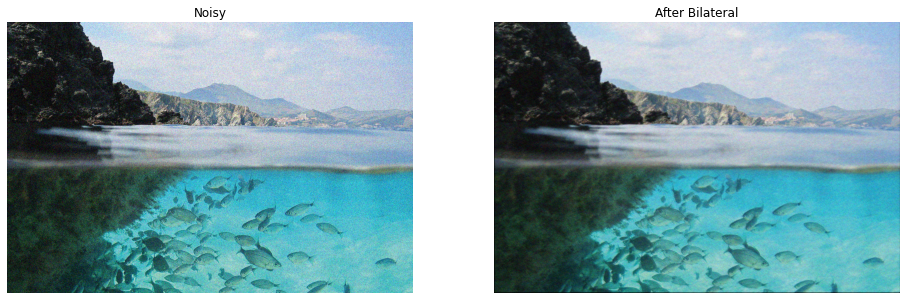

In [6]:
reduced_bilateral = denoise_bilateral(noised, multichannel = True)

show_comparison(noised, "Noisy", reduced_bilateral , "After Bilateral")

## **Superpixels and Segmentation**

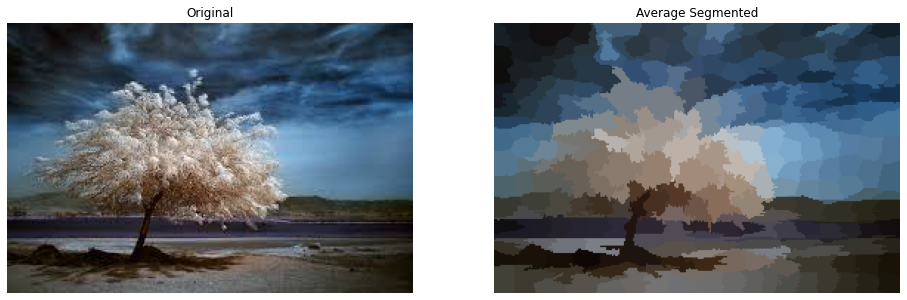

In [7]:
tree = plt.imread("segmentation.jpg")

segments = slic(tree, n_segments = 300)

segmented_avg = label2rgb(segments, tree, kind = "avg")

show_comparison(tree, "Original", segmented_avg, "Average Segmented")

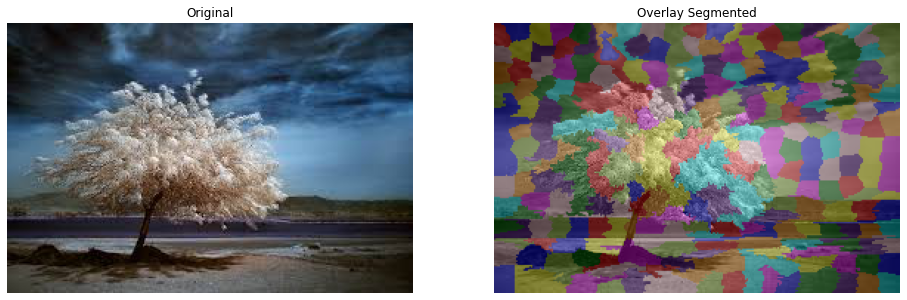

In [8]:
segmented_overlay = label2rgb(segments, tree, kind = "overlay") # The colors are selected randomly.

show_comparison(tree, "Original", segmented_overlay, "Overlay Segmented")

## **Finding Contours**

Finding the contours of an image, can be used for
*   Measuring size
*   Classifying shapes
*   Determining the number of objects




/usr/local/lib/python3.6/dist-packages/skimage/filters/thresholding.py:638: RuntimeWarning: divide by zero encountered in log
  (np.log(mean_back) - np.log(mean_fore)))


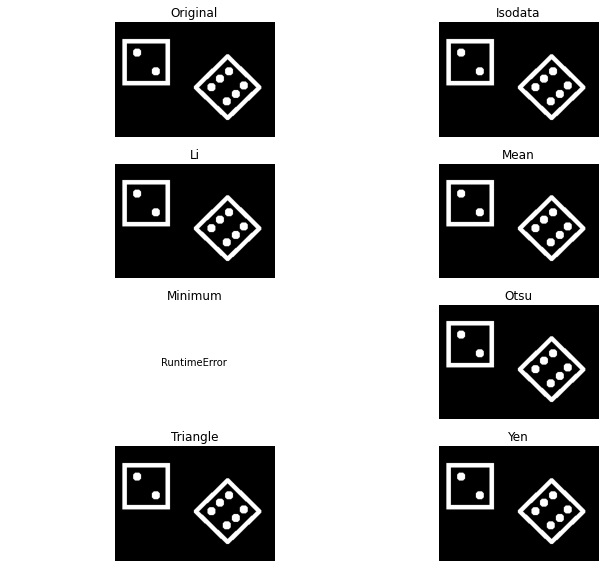

In [9]:
ball = plt.imread("dice.png")

ball_bin = color.rgb2gray(ball)

fig, ax = try_all_threshold(ball_bin, figsize=(10, 8), verbose=False)
plt.show()

Let's try to work with Triangle thresholding method.

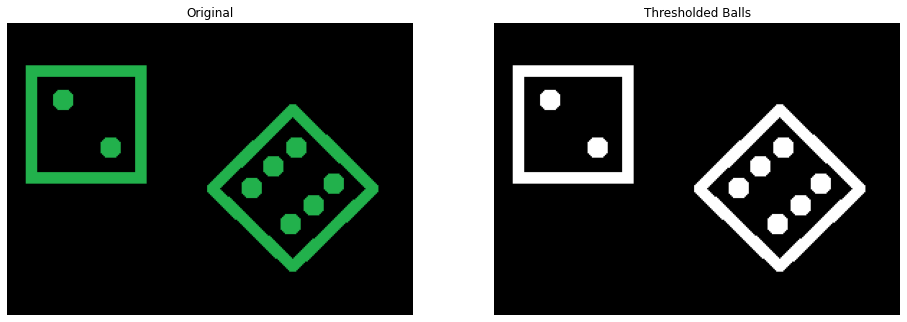

In [10]:
threshold_of_ball = threshold_triangle(ball_bin)
thresholded = ball_bin > threshold_of_ball

show_comparison(ball, "Original", thresholded, "Thresholded Balls")

In [11]:
contours = measure.find_contours(thresholded, 0.2)

Shape contours :  [333, 269, 57, 471, 399, 57, 57, 57, 57, 57, 57, 57]


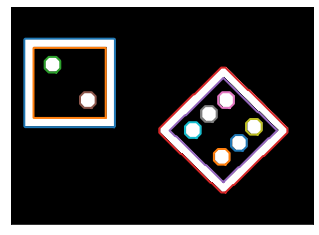

Dice's dots number: 8. 


In [12]:
shape_contours = [cnt.shape[0] for cnt in contours]

print ("Shape contours : ", shape_contours)

# Set 50 as the maximum size of the dots shape
max_dots_shape = 60

# Count dots in contours excluding bigger than dots size
dots_contours = [cnt for cnt in contours if np.shape(cnt)[0] < max_dots_shape]

fig, ax = plt.subplots()
ax.imshow(thresholded, cmap=plt.cm.gray)

for contour in contours:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

print("Dice's dots number: {}. ".format(len(dots_contours)))

57 represents the dots in the rectangles.